In [2]:
from time_series_generator import ts_generator
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

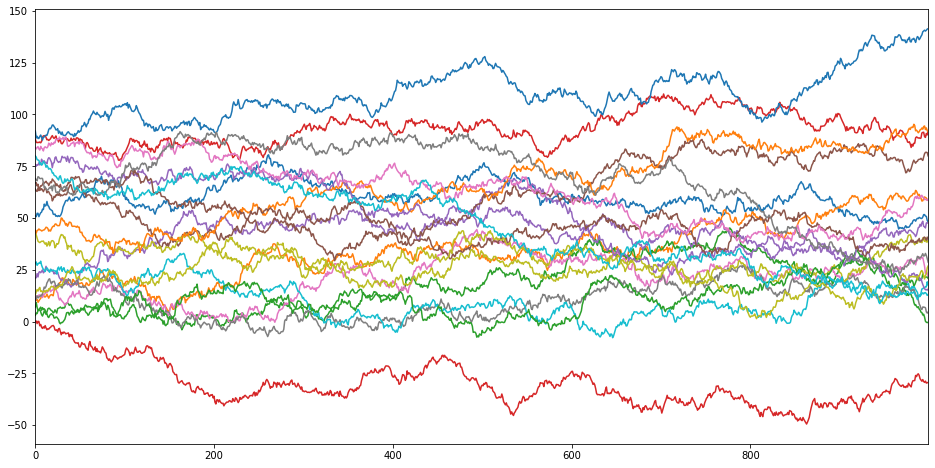

In [4]:
def generate_train_data(one_ts_df, name, lags):
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(one_ts_df.values)
    one_ts_df_scaled = pd.DataFrame(
        scaled_values, columns=one_ts_df.columns.values)
    for lag in range(1, lags):
        one_ts_df_scaled[[name+'_lag' +
                          str(lag)]] = one_ts_df_scaled[[name]].shift(lag)
    one_ts_df_scaled = one_ts_df_scaled.dropna()
    X = one_ts_df_scaled.drop(columns=[name])
    y = one_ts_df_scaled[name]
    return X, y
test_df = ts_generator().generate(20, 1000)
plt.show()

In [6]:

def count_mu_matrix(test_df, lags, max_depth):
    g_models = []
    X_values = []
    y_values = []
    for dt_name in test_df.columns.values:
        one_ts_df = test_df[[dt_name]]
        X, y = generate_train_data(one_ts_df, dt_name, lags)
        g_dt = DecisionTreeRegressor(max_depth=max_depth)
        g_dt.fit(X, y)
        g_models.append(g_dt)
        X_values.append(X)
        y_values.append(y)

    matrix_mu = []
    for model in g_models:
        errors = []
        for ts in range(0, len(X_values)):
            errors.append(model.score(X_values[ts], y_values[ts]))
        matrix_mu.append(errors)
    mu_df = pd.DataFrame(matrix_mu, columns=test_df.columns.values)
    mu_df.index = 'g_' + mu_df.index.astype(str)
    return mu_df, matrix_mu

lags = 50
max_depth = 20
mu_df, matrix_mu = count_mu_matrix(test_df, lags, max_depth)
mu_df

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,TS_10,TS_11,TS_12,TS_13,TS_14,TS_15,TS_16,TS_17,TS_18,TS_19
g_0,1.000000,0.968685,0.970187,0.951242,0.947200,0.973399,0.962338,0.955847,0.942981,0.954281,0.962959,0.975812,0.962548,0.950402,0.973119,0.962828,0.971045,0.972859,0.960267,0.975233
g_1,0.966927,1.000000,0.982307,0.971687,0.966106,0.987076,0.980878,0.973453,0.959257,0.972487,0.975628,0.984709,0.968422,0.972870,0.985567,0.975577,0.982278,0.973320,0.972993,0.985883
g_2,0.954339,0.974981,1.000000,0.967733,0.964191,0.987100,0.962869,0.972570,0.963504,0.969413,0.972399,0.984958,0.961032,0.968859,0.986569,0.974966,0.986538,0.943495,0.950342,0.984856
g_3,0.946606,0.971696,0.975329,1.000000,0.953144,0.976935,0.965648,0.960194,0.941340,0.959383,0.957407,0.978491,0.953053,0.950875,0.977686,0.959548,0.974579,0.969786,0.960733,0.978953
g_4,0.946870,0.970838,0.972461,0.959671,1.000000,0.975326,0.959936,0.957878,0.942114,0.955516,0.972424,0.972623,0.954121,0.951034,0.973667,0.963907,0.971023,0.970476,0.956729,0.968038
g_5,0.938747,0.972040,0.980619,0.958084,0.928774,1.000000,0.969658,0.969625,0.954169,0.961971,0.931712,0.989264,0.949859,0.970113,0.991830,0.950261,0.987271,0.980094,0.967912,0.990808
g_6,0.960313,0.976181,0.977177,0.963886,0.960567,0.981027,1.000000,0.967457,0.956171,0.967494,0.966628,0.983160,0.964721,0.964332,0.984868,0.968803,0.978885,0.982677,0.969941,0.984004
g_7,0.957921,0.971419,0.974994,0.961632,0.949398,0.982040,0.969573,1.000000,0.951344,0.966870,0.965761,0.974021,0.959927,0.958544,0.979872,0.964827,0.972784,0.966431,0.959135,0.980837
g_8,0.939918,0.958503,0.956911,0.952472,0.921362,0.968054,0.945379,0.947683,1.000000,0.948237,0.931010,0.964391,0.940186,0.946611,0.960561,0.945493,0.961321,0.905594,0.941010,0.960190
g_9,0.961122,0.974384,0.979072,0.962659,0.957667,0.979615,0.971953,0.968481,0.951174,1.000000,0.972000,0.982095,0.965487,0.959150,0.979553,0.973119,0.980325,0.973610,0.963556,0.985590


In [8]:
def count_p_matrix(test_df, matrix_mu):
    matrix_p = matrix_mu
    for i in range(0, 20):
        for j in range(0, 20):
            if i == j:
                matrix_p[i][j] = 0
            else:
                matrix_p[i][j] = (matrix_mu[i][j]+matrix_mu[j][i])/2
    p_df = pd.DataFrame(matrix_p, columns=test_df.columns.values)
    p_df.index = 'TS_' + p_df.index.astype(str)
    return p_df

p_df = count_p_matrix(test_df, matrix_mu)
p_df

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,TS_10,TS_11,TS_12,TS_13,TS_14,TS_15,TS_16,TS_17,TS_18,TS_19
TS_0,0.000000,0.967586,0.960282,0.948344,0.946994,0.951742,0.961072,0.957143,0.941067,0.958557,0.962037,0.964995,0.958117,0.953484,0.946911,0.951584,0.958189,0.912772,0.954649,0.873881
TS_1,0.967476,0.000000,0.977728,0.971693,0.969064,0.977678,0.977942,0.972182,0.958786,0.973673,0.975840,0.984426,0.970743,0.975807,0.968107,0.967511,0.975868,0.924196,0.974259,0.912845
TS_2,0.959291,0.977271,0.000000,0.972481,0.969360,0.983049,0.971812,0.974085,0.959383,0.975450,0.976891,0.984538,0.970624,0.975042,0.980068,0.961380,0.984469,0.924896,0.965606,0.942988
TS_3,0.948054,0.971694,0.972956,0.000000,0.957223,0.965153,0.964547,0.961093,0.948298,0.961431,0.961859,0.972199,0.953651,0.960328,0.959282,0.952230,0.969810,0.903318,0.962730,0.894696
TS_4,0.946973,0.969359,0.969877,0.957631,0.000000,0.946231,0.960330,0.952578,0.929144,0.956860,0.968214,0.962221,0.956108,0.951491,0.935693,0.962062,0.954201,0.877279,0.952477,0.849219
TS_5,0.949576,0.976739,0.982644,0.963975,0.943322,0.000000,0.976764,0.977385,0.962847,0.972998,0.965785,0.989664,0.969394,0.977426,0.990495,0.946271,0.988790,0.950725,0.973714,0.963914
TS_6,0.960946,0.977648,0.972706,0.964437,0.960369,0.977474,0.000000,0.968779,0.949426,0.970281,0.962981,0.979980,0.967637,0.966395,0.969395,0.966945,0.971997,0.945011,0.969354,0.910402
TS_7,0.957273,0.972054,0.974236,0.961183,0.952048,0.978161,0.968911,0.000000,0.949056,0.967877,0.967869,0.975066,0.963022,0.963730,0.969635,0.953269,0.974254,0.923396,0.963330,0.950856
TS_8,0.940876,0.958739,0.958971,0.948993,0.927847,0.963715,0.948751,0.948827,0.000000,0.950073,0.946147,0.963367,0.943559,0.954116,0.954034,0.937834,0.961333,0.885658,0.948236,0.882873
TS_9,0.958984,0.973791,0.976053,0.961635,0.956995,0.974101,0.970560,0.967977,0.950256,0.000000,0.969445,0.974591,0.961123,0.964022,0.961686,0.959406,0.974153,0.917135,0.963315,0.932421


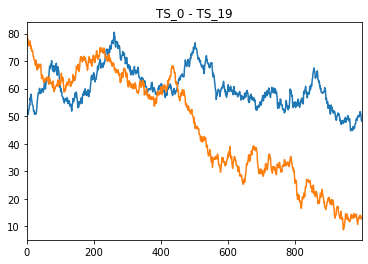

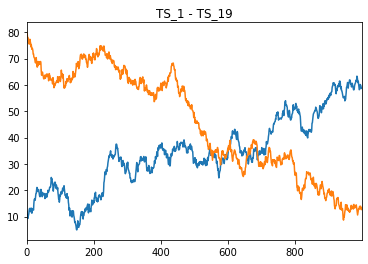

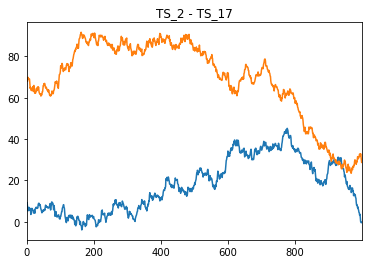

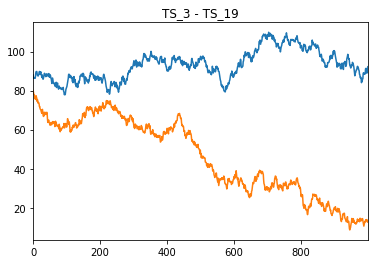

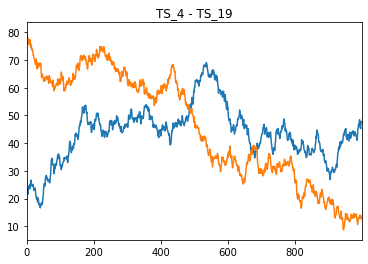

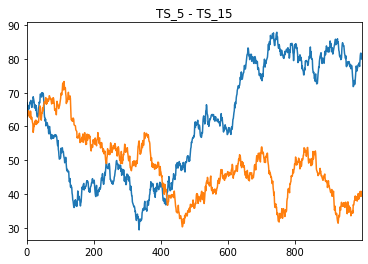

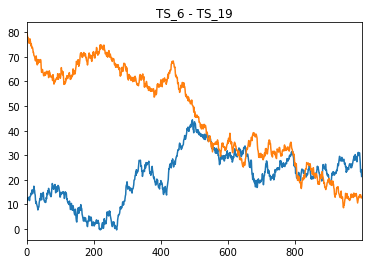

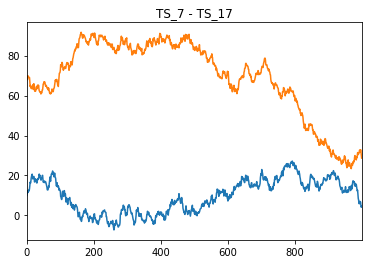

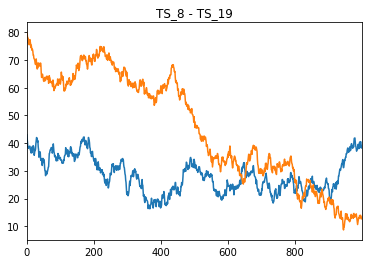

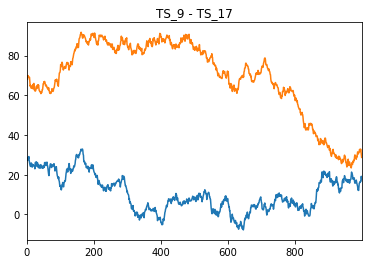

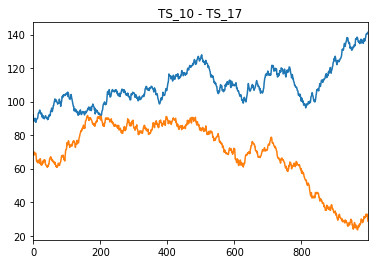

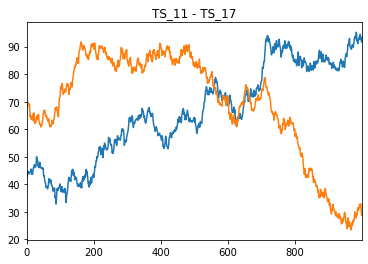

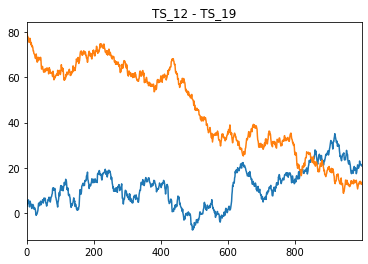

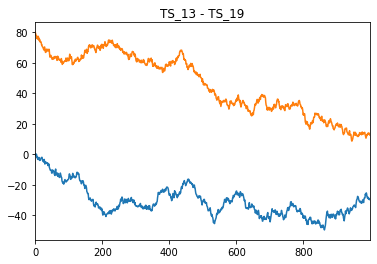

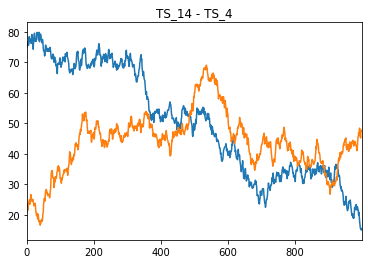

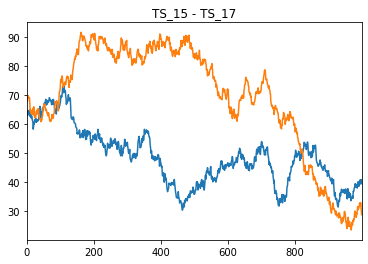

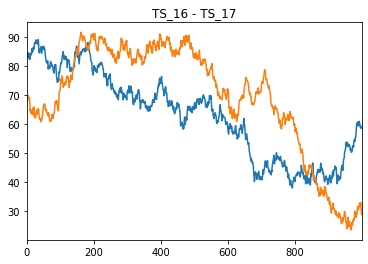

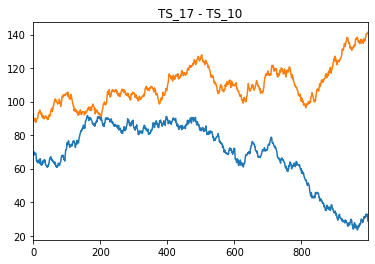

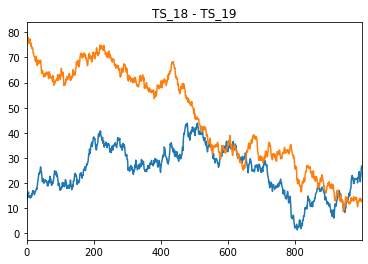

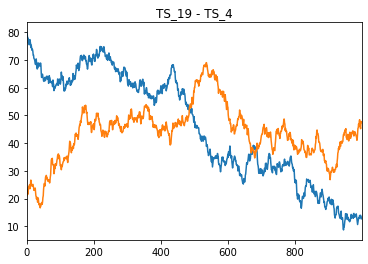

In [9]:
def nearest_ts_plot(test_df, p_df):
    for column_name in test_df.columns.values:
        test_df[column_name].plot()
        diff = p_df[column_name].to_list()
        diff.sort()
        min_diff = diff[1]
        nearest_ts = p_df[column_name][p_df[column_name]
                                       == min_diff].index.values[0]
        test_df[nearest_ts].plot(title=column_name+' - '+nearest_ts)
        plt.show()
nearest_ts_plot(test_df, p_df)